# IPL 2024 Auction Data

### Importing Essential Python Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading our Data and Data Glance

In [6]:
df=pd.read_csv('Datasets/IPL_PLAYERS.csv')
print(df.shape)
df.head()

(72, 5)


,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


In [7]:
df.columns

Index(['PLAYERS', 'NATIONALITY', 'TYPE', 'PRICE PAID', 'TEAM'], dtype='object')

### Setting up Specific Column as Index

In [8]:
df.set_index('TEAM', inplace=True)

In [9]:
df.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID
TEAM,,,,
CSK,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000
CSK,Mustafizur Rahman,Overseas,Bowler,20000000
CSK,Daryl Mitchell,Overseas,All-Rounder,140000000
CSK,Sameer Rizvi,Indian,Batter,84000000
CSK,Rachin Ravindra,Overseas,All-Rounder,18000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, CSK to SH
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ KB


### Numerical analysis and visualization

**Price Plotting comparison between Price Paid and Team**

<Axes: xlabel='TEAM'>

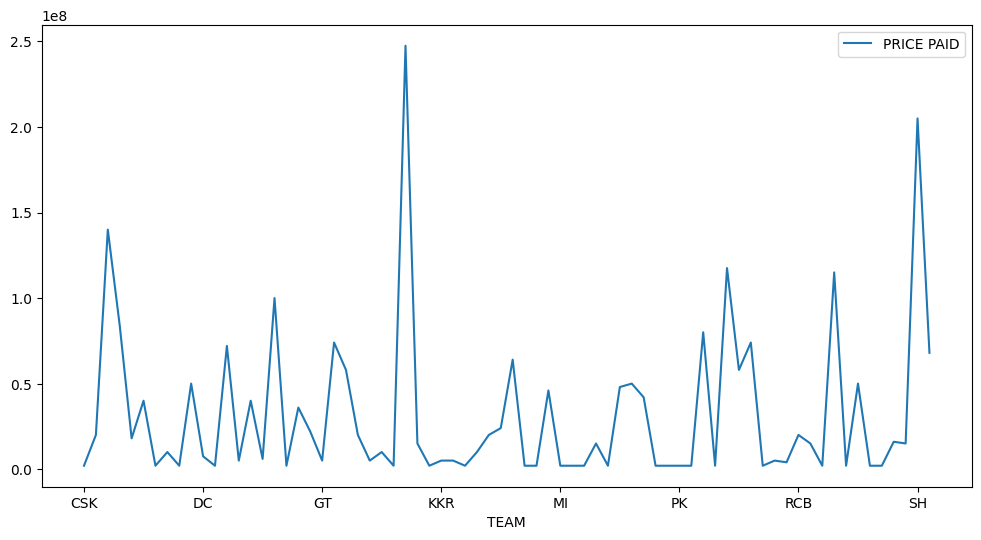

In [11]:
df.plot(y='PRICE PAID', figsize=(12,6))

**Value Count for Type of Players**

<Axes: ylabel='count'>

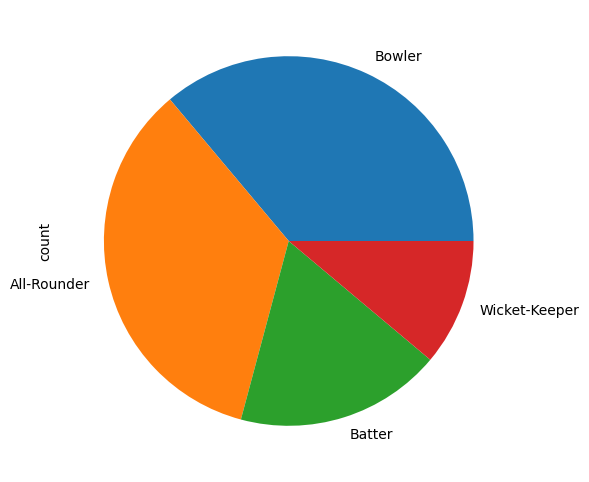

In [12]:
df['TYPE'].value_counts().plot(kind='pie', figsize=(6,6))

**Count of Nationality of Players** 

In [13]:
ax = df['NATIONALITY'].value_counts()
ax

NATIONALITY
Indian      42
Overseas    30
Name: count, dtype: int64

Text(0, 0.5, 'NO OF NATIONALITY PLAYERS COUNT')

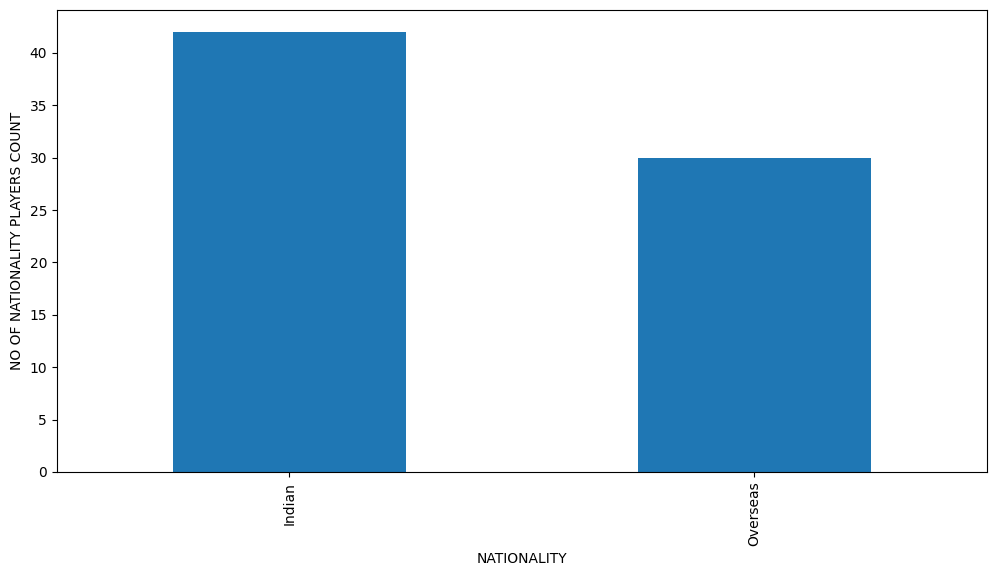

In [14]:
ax = df['NATIONALITY'].value_counts().plot(kind='bar', figsize=(12,6))
ax.set_ylabel('NO OF NATIONALITY PLAYERS COUNT')

<Axes: xlabel='TYPE', ylabel='PRICE PAID'>

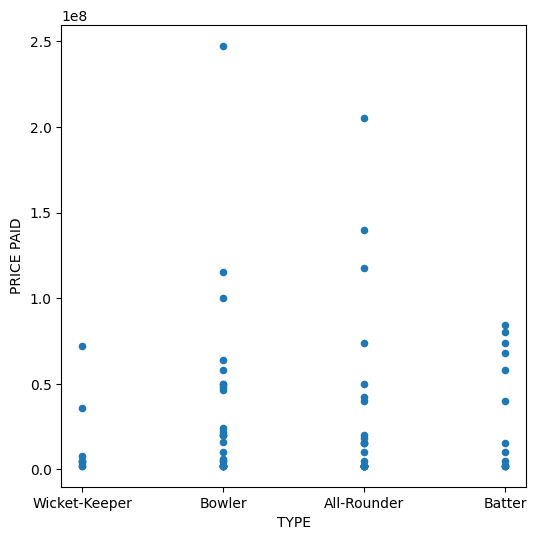

In [15]:
df.plot(kind='scatter', x='TYPE', y='PRICE PAID', figsize=(6,6))

**Costliest Price Paid for the Players**

In [16]:
mask_costliest_players = (df['PRICE PAID'] > 15000000) & (df['PRICE PAID'] < 25000000)
costliest_players = mask_costliest_players
costliest_players[costliest_players]

TEAM
CSK    True
CSK    True
GT     True
KKR    True
LSG    True
LSG    True
RCB    True
SH     True
Name: PRICE PAID, dtype: bool

In [17]:
df[(df['PRICE PAID'] > 15000000) & (df['PRICE PAID'] < 25000000)]

,PLAYERS,NATIONALITY,TYPE,PRICE PAID
TEAM,,,,
CSK,Mustafizur Rahman,Overseas,Bowler,20000000
CSK,Rachin Ravindra,Overseas,All-Rounder,18000000
GT,Sushant Mishra,Indian,Bowler,22000000
KKR,Mujeeb Rahman,Overseas,Bowler,20000000
LSG,David Willey,Overseas,All-Rounder,20000000
LSG,M. Siddharth,Indian,Bowler,24000000
RCB,Lockie Ferguson,Overseas,Bowler,20000000
SH,Jaydev Unadkat,Indian,Bowler,16000000


# Loading Top Buys for this year Data

In [20]:
top_buys_df = pd.read_csv('Datasets/TOP_BUYS.csv', thousands= ' ')
top_buys_df.head()

,TEAM,NATIONALITY,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


### Manipulating the loaded Data

In [21]:
Price_Paid = df['PRICE PAID']
print("Sum of Price Paid by all the teams: ", Price_Paid.sum())

Sum of Price Paid by all the teams:  2304500000


In [22]:
top_buys_df.describe()

,TEAM,NATIONALITY,TYPE,PRICE PAID
count,10,10,10,10
unique,7,10,3,9
top,Chennai Super Kings,Mitchell Starc,All-Rounder,"7,40,00,000"
freq,2,1,4,2


In [23]:
top_buys_df.dtypes

TEAM           object
NATIONALITY    object
TYPE           object
PRICE PAID     object
dtype: object

In [24]:
top_buys_df.dtypes.value_counts()

object    4
Name: count, dtype: int64

### Indexing, Selection and Slicing

In [25]:
top_buys_df.iloc[0:5]

,TEAM,NATIONALITY,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


In [26]:
top_buys_df.iloc[0]

TEAM           Kolkata Knight Riders
NATIONALITY           Mitchell Starc
TYPE                          Bowler
PRICE PAID              24,75,00,000
Name: 0, dtype: object

In [27]:
top_buys_df.loc[top_buys_df['TEAM'] == 'Chennai Super Kings']

,TEAM,NATIONALITY,TYPE,PRICE PAID
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
6,Chennai Super Kings,Sameer Rizvi,Batter,"8,40,00,000"


### Renaming specific values within a column in a Pandas DataFrame

In [28]:
top_buys_df['TEAM'] = top_buys_df['TEAM'].replace(
    {'Chennai Super Kings': 'CSK', 
     'Punjab Kings' : 'PBKS',
     'Kolkata Knight Riders' : 'KKR',
     'Sunrisers Hyderabad': 'SRH',
     'Gujarat Titans': 'GT',
     'Royal Challengers Bangalore' : 'RCB',
     'Rajasthan Royals': 'RR',
     })

In [29]:
top_buys_df

,TEAM,NATIONALITY,TYPE,PRICE PAID
0,KKR,Mitchell Starc,Bowler,"24,75,00,000"
1,SRH,Pat Cummins,All-Rounder,"20,50,00,000"
2,CSK,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,PBKS,Harshal Patel,All-Rounder,"11,75,00,000"
4,RCB,Alzarri Joseph,Bowler,"11,50,00,000"
5,GT,Spencer Johnson,Bowler,"10,00,00,000"
6,CSK,Sameer Rizvi,Batter,"8,40,00,000"
7,PBKS,Rilee Rossouw,Batter,"8,00,00,000"
8,GT,Shahrukh Khan,All-Rounder,"7,40,00,000"
9,RR,Rovman Powell,Batter,"7,40,00,000"


In [30]:
top_buys_df['PRICE PAID']

0     24,75,00,000
1     20,50,00,000
2     14,00,00,000
3     11,75,00,000
4     11,50,00,000
5     10,00,00,000
6      8,40,00,000
7      8,00,00,000
8      7,40,00,000
9      7,40,00,000
Name: PRICE PAID, dtype: object

### Converting datatype of 'PRICE PAID' Column from "object" to integer"

In [31]:

top_buys_df['PRICE PAID'] = pd.to_numeric(top_buys_df['PRICE PAID'].str.replace(',', ''))

In [32]:
top_buys_df['PRICE PAID'].iloc[1]

205000000

In [33]:
top_buys_df.dtypes

TEAM           object
NATIONALITY    object
TYPE           object
PRICE PAID      int64
dtype: object

### Ploting the Percentage of Team bought players

<Axes: xlabel='TEAM', ylabel='PERCENTAGE'>

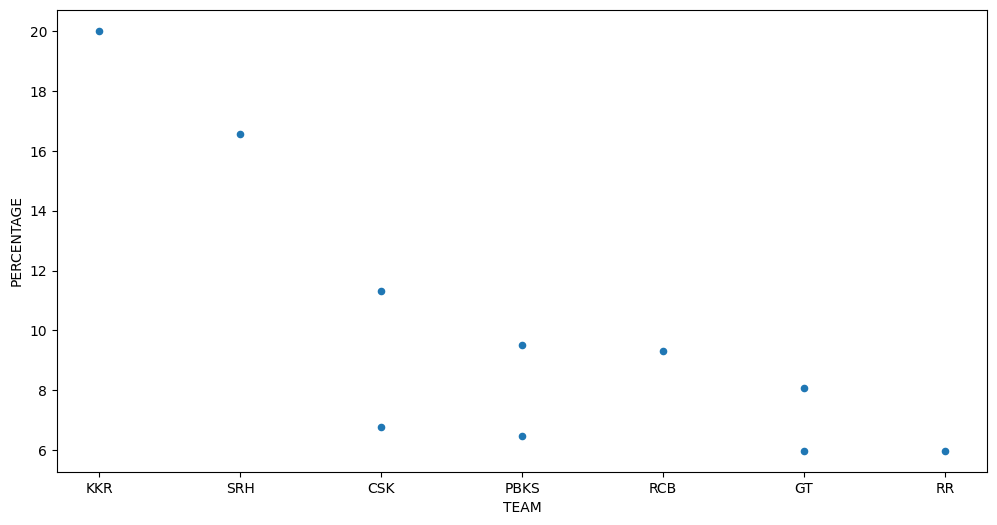

In [34]:
top_buys_df['PERCENTAGE'] = (top_buys_df['PRICE PAID']/ top_buys_df['PRICE PAID'].sum()) * 100
top_buys_df.plot(x='TEAM', y='PERCENTAGE', kind='scatter', figsize=(12,6))

In [35]:
top_buys_df

,TEAM,NATIONALITY,TYPE,PRICE PAID,PERCENTAGE
0,KKR,Mitchell Starc,Bowler,247500000,20.008084
1,SRH,Pat Cummins,All-Rounder,205000000,16.572352
2,CSK,Daryl Mitchell,All-Rounder,140000000,11.317704
3,PBKS,Harshal Patel,All-Rounder,117500000,9.498787
4,RCB,Alzarri Joseph,Bowler,115000000,9.296686
5,GT,Spencer Johnson,Bowler,100000000,8.084074
6,CSK,Sameer Rizvi,Batter,84000000,6.790622
7,PBKS,Rilee Rossouw,Batter,80000000,6.467259
8,GT,Shahrukh Khan,All-Rounder,74000000,5.982215
9,RR,Rovman Powell,Batter,74000000,5.982215


In [36]:
top_buys_df['PERCENTAGE'].sum()

100.0

In [37]:
top_buys_df['PRICE PAID'][0]

247500000

In [38]:
top_buys_df

,TEAM,NATIONALITY,TYPE,PRICE PAID,PERCENTAGE
0,KKR,Mitchell Starc,Bowler,247500000,20.008084
1,SRH,Pat Cummins,All-Rounder,205000000,16.572352
2,CSK,Daryl Mitchell,All-Rounder,140000000,11.317704
3,PBKS,Harshal Patel,All-Rounder,117500000,9.498787
4,RCB,Alzarri Joseph,Bowler,115000000,9.296686
5,GT,Spencer Johnson,Bowler,100000000,8.084074
6,CSK,Sameer Rizvi,Batter,84000000,6.790622
7,PBKS,Rilee Rossouw,Batter,80000000,6.467259
8,GT,Shahrukh Khan,All-Rounder,74000000,5.982215
9,RR,Rovman Powell,Batter,74000000,5.982215


In [39]:
top_buys_df['PRICE PAID'].describe()

count    1.000000e+01
mean     1.237000e+08
std      5.897608e+07
min      7.400000e+07
25%      8.100000e+07
50%      1.075000e+08
75%      1.343750e+08
max      2.475000e+08
Name: PRICE PAID, dtype: float64

In [40]:
Per_of_Team = top_buys_df['TEAM'].value_counts() 

In [63]:
Per_of_Team = top_buys_df.groupby('TEAM')['PRICE PAID'].sum()
Per_of_Team = (top_buys_df['PRICE PAID'] / top_buys_df['PRICE PAID'].sum()) * 100

In [64]:
Per_of_Team

TEAM
KKR     20.008084
SRH     16.572352
CSK     11.317704
PBKS     9.498787
RCB      9.296686
GT       8.084074
CSK      6.790622
PBKS     6.467259
GT       5.982215
RR       5.982215
Name: PRICE PAID, dtype: float64

In [67]:
per_of_team = (top_buys_df.groupby('TEAM')['PRICE PAID'].sum()) * 100

In [68]:
per_of_team

TEAM
CSK     22400000000
GT      17400000000
KKR     24750000000
PBKS    19750000000
RCB     11500000000
RR       7400000000
SRH     20500000000
Name: PRICE PAID, dtype: int64

In [69]:
per_of_team = (per_of_team / per_of_team.sum()) * 100
per_of_team

TEAM
CSK     18.108327
GT      14.066289
KKR     20.008084
PBKS    15.966047
RCB      9.296686
RR       5.982215
SRH     16.572352
Name: PRICE PAID, dtype: float64

In [70]:
per_of_team.sum()

100.0

In [71]:
per_of_team.dtypes

dtype('float64')

### Ploting the Total Percentage of amount spend by each team

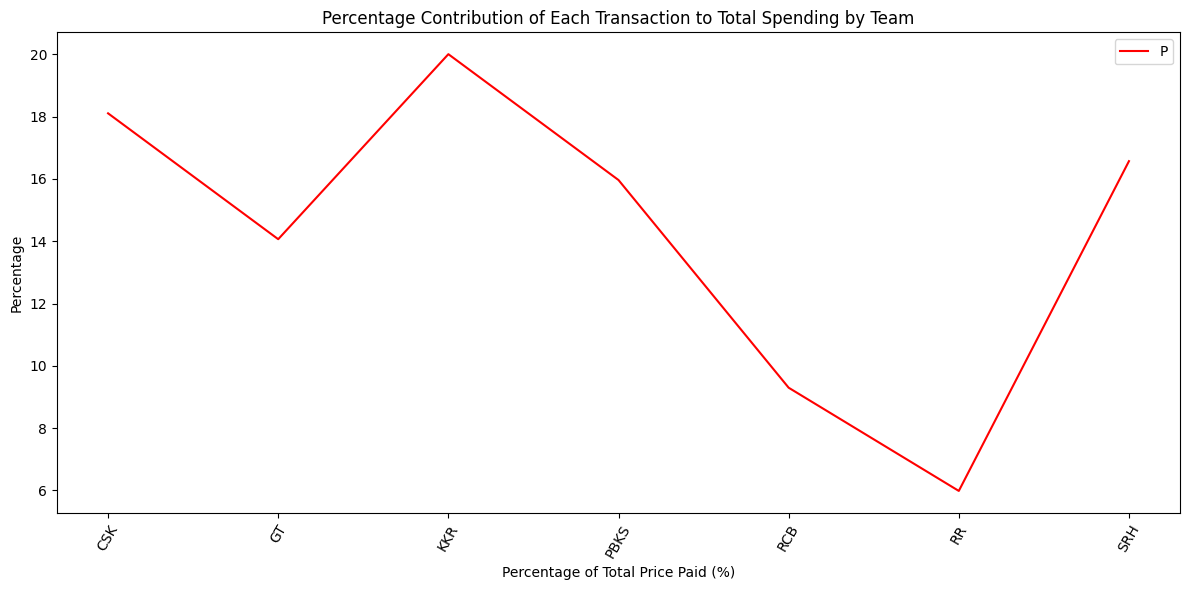

In [72]:
per_of_team.plot(kind='line', figsize=(12,6), color='red')
plt.xlabel('Percentage of Total Price Paid (%)')
plt.ylabel('Percentage')
plt.title('Percentage Contribution of Each Transaction to Total Spending by Team')
plt.yticks()
plt.legend('PERCENTAGE')
plt.xticks(rotation=60)
plt.tight_layout()